In [14]:
#!pip install numpy
#!pip install gym
#!pip install matplotlib
import numpy as np
import gym
import matplotlib.pyplot as plt
import pickle

In [2]:
#Spaces erstellen um stetige Werte für Position und Geschwindigkeit in diskrete Werte einzuordnen
pos_buckets = np.linspace(-1.2, 0.6, 20)
vel_buckets = np.linspace(-0.07, 0.07, 20)

In [3]:
#Status des Objektes wird durch Position und Geschwindigkeit in diskreten Werten zurueckgegeben
def toDiscreteStates(obs):
    pos, vel = obs
    
    #Stetige Werte werden in die oben definierten Buckets eingeordnet
    pos_disc = np.digitize(pos, pos_buckets)
    vel_disc = np.digitize(vel, vel_buckets)
    
    return(pos_disc, vel_disc)

In [4]:
#Funktion, um die naechste Aktion herauszufinden
def get_action(Q, obs, actions=[0,1,2]):
    #Epsilon-Greedy-Algorithmus
    #Mit einer Wahrscheinlichtkeit von Epsilon wird eine zufällige Aktion ausgeführt
    if np.random.random() < eps:
        action = np.random.choice([0,1,2])
    #Sonst wird die Aktion ausgewählt, die wahrscheinlich die beste Belohnung ergibt
    else: 
        state = toDiscreteStates(obs)
        values = []
        for a in actions:
            values.append(Q[state, a])

        action = np.argmax(values)
    
    return action

In [5]:
env = gym.make('MountainCar-v0') #Umgebung erstellen
env._max_episode_steps = 1000 #Maximale Steps bis das Spiel abbricht, wenn es nicht geschafft wird
n_games = 50000 #Anzahl der Trainingsdurchlaeufe
alpha = 0.1 
gamma = 0.99
eps = 1.0

In [6]:
#2-Dimensionale Liste mit allen moeglichen Status
states = []
for pos in range(21):
    for vel in range(21):
        states.append((pos,vel))

In [7]:
#Q-Tabelle als Dictionary der Form 441x3 mit allen Kombinationen aus Position & Aktion
Q = {}
for state in states:
    for action in [0,1,2]:
        Q[state, action] = 0

In [8]:
#Funktion um Q-Tabelle lokal abzuspeichern
def saveQ():
    with open('obj/Qtable.pkl', 'wb') as f:
        pickle.dump(Q, f, pickle.HIGHEST_PROTOCOL)

In [9]:
#Funktion um lokale Q-Tabelle zu laden und so an vorheriges Lernen anknuepfen zu koennen
def loadQ(obs, action, reward, new_obs_new_action):
    with open('obj/Qtable.pkl', 'rb') as f:
        pickle.load(f)

In [10]:
#Funktion um den Belohnungswert zum aktuellen Status in die Q-Tabelle einzutragen
def updateQ_SARSA(obs, action, reward, new_obs, new_action):
    state = toDiscreteStates(obs)
    new_state = toDiscreteStates(new_obs)
    Q[state, action] = Q[state, action] + alpha*(reward + gamma*Q[new_state, new_action] - Q[state, action])

In [11]:
#Spielt mit der gespeicherten Q-Tabelle 10 Spiele um den Lernfortschritt darzustellen
def show_results():
    Q = loadQ()
    new_eps = 0.01
    for i in range(10):
        done = False
        obs = env.reset()
        while not done:
            if np.random.random() < new_eps:
                action = np.random.choice ([0,1,2])
            else:
                action = max_action(Q, obs)
                
            new_obs, reward, done, info = env.step(action)
            new_action = max_action(Q, new_obs)
            updateQ(obs, action, reward, new_obs, new_action)
            obs = new_obs
            env.render()

In [12]:
#Fuehrt das eigentliche Spielen und Lernen aus

score = 0 #Belohnung eines einzelnen Spieldurchlaufes
total_rewards = np.zeros(n_games) #Belohnung aller Durchlaeufe

for i in range(n_games):
    done = False
    obs = env.reset() #Beobachtung zum Startzeitpunkt
    if i % 100 == 0 and i>0:
        print('episode ', i, 'score ', score, 'eps ', eps)
    score = 0
    while not done:
        #Aktion wird erfragt, neue Beobachtung des Status, die Belohnung und Information, ob das Spiel vorbei ist zurueckgegeben
        action = get_action(Q, obs)
        new_obs, reward, done, info = env.step(action)
        score += reward
        new_action = get_action(Q, new_obs)
        updateQ_SARSA(obs, action, reward, new_obs, new_action)
        obs = new_obs
    total_rewards[i] = score
    # Epsilon wird so verringt, dass es nach der Hälfte der Spiele seinen Minimalwert erreicht
    if eps > 0.01:
        eps = eps - 2/n_games
    else:
        eps = 0.01

episode  100 score  -1000.0 eps  0.995999999999996
episode  200 score  -1000.0 eps  0.991999999999992
episode  300 score  -1000.0 eps  0.987999999999988
episode  400 score  -1000.0 eps  0.983999999999984
episode  500 score  -1000.0 eps  0.97999999999998
episode  600 score  -1000.0 eps  0.975999999999976
episode  700 score  -1000.0 eps  0.971999999999972
episode  800 score  -1000.0 eps  0.967999999999968
episode  900 score  -1000.0 eps  0.963999999999964
episode  1000 score  -1000.0 eps  0.95999999999996
episode  1100 score  -1000.0 eps  0.955999999999956
episode  1200 score  -1000.0 eps  0.951999999999952
episode  1300 score  -1000.0 eps  0.947999999999948
episode  1400 score  -1000.0 eps  0.943999999999944
episode  1500 score  -1000.0 eps  0.93999999999994
episode  1600 score  -1000.0 eps  0.935999999999936
episode  1700 score  -1000.0 eps  0.931999999999932
episode  1800 score  -1000.0 eps  0.927999999999928
episode  1900 score  -1000.0 eps  0.923999999999924
episode  2000 score  -85

episode  16000 score  -230.0 eps  0.3599999999995543
episode  16100 score  -204.0 eps  0.35599999999955584
episode  16200 score  -322.0 eps  0.3519999999995574
episode  16300 score  -160.0 eps  0.34799999999955894
episode  16400 score  -287.0 eps  0.3439999999995605
episode  16500 score  -167.0 eps  0.33999999999956204
episode  16600 score  -235.0 eps  0.3359999999995636
episode  16700 score  -157.0 eps  0.33199999999956514
episode  16800 score  -193.0 eps  0.3279999999995667
episode  16900 score  -268.0 eps  0.32399999999956824
episode  17000 score  -303.0 eps  0.3199999999995698
episode  17100 score  -197.0 eps  0.31599999999957135
episode  17200 score  -204.0 eps  0.3119999999995729
episode  17300 score  -184.0 eps  0.30799999999957445
episode  17400 score  -360.0 eps  0.303999999999576
episode  17500 score  -115.0 eps  0.29999999999957755
episode  17600 score  -169.0 eps  0.2959999999995791
episode  17700 score  -234.0 eps  0.29199999999958065
episode  17800 score  -241.0 eps  0.28

episode  33700 score  -161.0 eps  0.01
episode  33800 score  -149.0 eps  0.01
episode  33900 score  -135.0 eps  0.01
episode  34000 score  -150.0 eps  0.01
episode  34100 score  -135.0 eps  0.01
episode  34200 score  -153.0 eps  0.01
episode  34300 score  -134.0 eps  0.01
episode  34400 score  -170.0 eps  0.01
episode  34500 score  -130.0 eps  0.01
episode  34600 score  -162.0 eps  0.01
episode  34700 score  -140.0 eps  0.01
episode  34800 score  -143.0 eps  0.01
episode  34900 score  -131.0 eps  0.01
episode  35000 score  -135.0 eps  0.01
episode  35100 score  -138.0 eps  0.01
episode  35200 score  -131.0 eps  0.01
episode  35300 score  -136.0 eps  0.01
episode  35400 score  -109.0 eps  0.01
episode  35500 score  -134.0 eps  0.01
episode  35600 score  -132.0 eps  0.01
episode  35700 score  -137.0 eps  0.01
episode  35800 score  -128.0 eps  0.01
episode  35900 score  -129.0 eps  0.01
episode  36000 score  -129.0 eps  0.01
episode  36100 score  -141.0 eps  0.01
episode  36200 score  -13

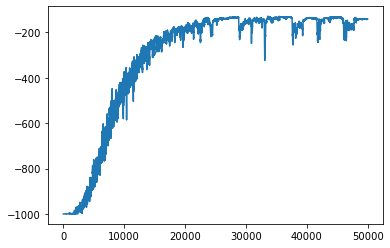

In [18]:
saveQ()
# show_result()
mean_rewards = np.zeros(n_games)
for r in range(n_games):
    mean_rewards[r] = np.mean(total_rewards[max(0, r-50):(r+1)])
plt.plot(mean_rewards)
plt.savefig('mountaincar.png')